# Food Carbon Food Print Chaptr Group Project

Climate change is at the center of boardroom discussions, on how the increased talk and regulation will impact businesses and how they can capitalize on this to be sustainable in the future and not treat it as an obstacle to growth. At an individual level we also share in the responsibility of making the right decisions that care for the future generations. The most effective way of doing this is to stay informed on what the major contributors to this 21st century menace is, and thereby make informed choices and shape policy.

In our project we will be exploring food carbon emissions- The environmental impacts of our eating habits.

Food Carbon Footprint Index 2018 | nu3 Conducted a research on directly comparing different diets in terms of carbon dioxide emissions. The research, which reveals the annual CO2 emissions per person for 130 nations worldwide, shows which countries could significantly reduce their carbon footprint by switching to a plant-based diet, as well as which food types generate the highest carbon dioxide emissions.

### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls

%matplotlib inline

In [2]:
food = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv')

In [3]:
food.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [4]:
food.tail()

,country,food_category,consumption,co2_emmission
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27
1429,Bangladesh,Nuts inc. Peanut Butter,0.72,1.27


In [5]:
food.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [6]:
food.shape

(1430, 4)

In [9]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [10]:
food_info= pd.DataFrame({"Dtype": food.dtypes, "Unique": food.nunique(), "Missing%": (food.isnull().sum()/food.shape[0])*100})
food_info

,Dtype,Unique,Missing%
country,object,130,0.0
food_category,object,11,0.0
consumption,float64,1113,0.0
co2_emmission,float64,1183,0.0


We will use the data  provided to explore the following:

### 1. The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.

In [11]:
country_df= food.groupby(['country', 'food_category'])['co2_emmission'].mean().reset_index()
country_df

,country,food_category,co2_emmission
0,Albania,Beef,694.30
1,Albania,Eggs,11.44
2,Albania,Fish,6.15
3,Albania,Lamb & Goat,536.50
4,Albania,Milk - inc. cheese,432.62
...,...,...,...
1425,Zimbabwe,Pork,9.38
1426,Zimbabwe,Poultry,5.34
1427,Zimbabwe,Rice,12.91
1428,Zimbabwe,Soybeans,0.24


#### Kenya

                food_category  co2_emmission
693                      Beef         294.38
694                      Eggs           1.69
695                      Fish           6.82
696               Lamb & Goat          65.14
697        Milk - inc. cheese         135.12
698   Nuts inc. Peanut Butter           2.90
699                      Pork           1.03
700                   Poultry           0.50
701                      Rice          16.56
702                  Soybeans           0.09
703  Wheat and Wheat Products           6.61


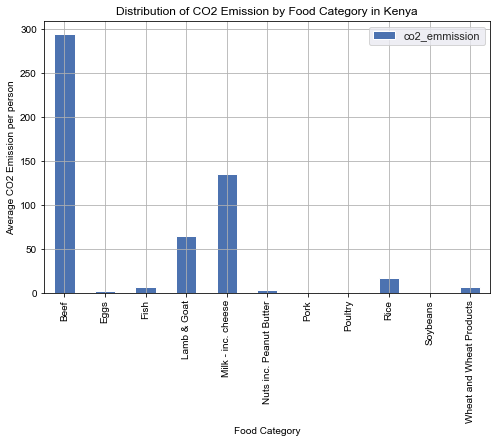

In [12]:
Kenya = country_df.loc[country_df['country']=='Kenya'].drop('country', axis=1)
print(Kenya)

fig, ax = plt.subplots(figsize=(8,5))
sns.set()
Kenya.set_index('food_category').plot(kind='bar', stacked=True, ax= ax)
plt.title('Distribution of CO2 Emission by Food Category in Kenya')
plt.ylabel('Average CO2 Emission per person')
plt.xlabel('Food Category')

plt.show()

Beef has the highest average co2 emissions per person (294.38). Milk - inc. cheese (135.12) is the second highest and Lamb & Goat (65.14) the third highest.
Soybeans has the lowest average co2 emissions per person (0.09). Poultry (0.50) is the second lowest and Pork (1.03) the third highest.

#### Tanzania

                 food_category  co2_emmission
1254                      Beef         187.92
1255                      Eggs           0.53
1256                      Fish           8.78
1257               Lamb & Goat          44.83
1258        Milk - inc. cheese          57.39
1259   Nuts inc. Peanut Butter          10.51
1260                      Pork           1.13
1261                   Poultry           1.98
1262                      Rice          26.89
1263                  Soybeans           0.02
1264  Wheat and Wheat Products           3.04


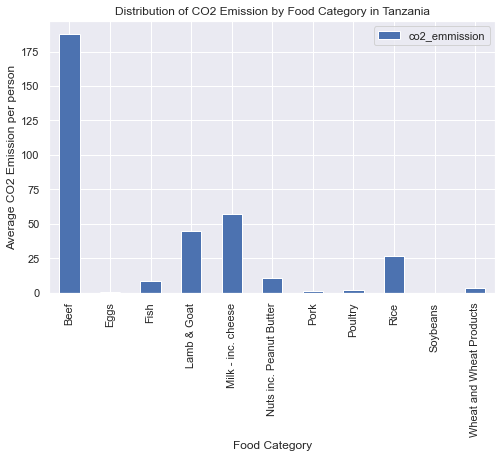

In [13]:
Tanzania = country_df.loc[country_df['country']=='Tanzania'].drop('country', axis=1)
print(Tanzania)

fig, ax = plt.subplots(figsize=(8,5))
sns.set()
Tanzania.set_index('food_category').plot(kind='bar', stacked=True, ax= ax)
plt.title('Distribution of CO2 Emission by Food Category in Tanzania')
plt.ylabel('Average CO2 Emission per person')
plt.xlabel('Food Category')
plt.show()

Beef has the highest average co2 emissions per person (187.92). Milk - inc. cheese (57.39) is the second highest and Lamb & Goat (44.83) the third highest.
Soybeans has the lowest average co2 emissions per person (0.02). Eggs (0.53) is the second lowest and Pork (1.13) the third highest.

#### Uganda

                 food_category  co2_emmission
1331                      Beef         158.92
1332                      Eggs           0.89
1333                      Fish          19.96
1334               Lamb & Goat          43.77
1335        Milk - inc. cheese          53.09
1336   Nuts inc. Peanut Butter           6.67
1337                      Pork          11.93
1338                   Poultry           1.62
1339                      Rice           5.94
1340                  Soybeans           0.00
1341  Wheat and Wheat Products           1.93


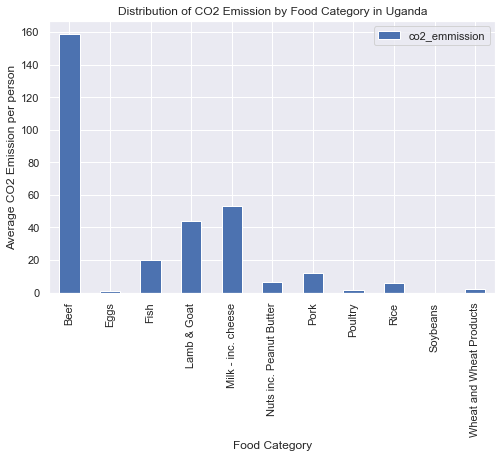

In [16]:
Uganda = country_df.loc[country_df['country']=='Uganda'].drop('country', axis=1)
print(Uganda)

fig, ax = plt.subplots(figsize=(8,5))
sns.set()
Uganda.set_index('food_category').plot(kind='bar', stacked=True, ax= ax)
plt.title('Distribution of CO2 Emission by Food Category in Uganda')
plt.ylabel('Average CO2 Emission per person')
plt.xlabel('Food Category')
plt.show()

Beef has the highest average co2 emissions per person (158.92). Milk - inc. cheese (53.09) is the second highest and Lamb & Goat (43.77) the third highest.
Soybeans has the lowest average co2 emissions per person (0.00). Eggs (0.89) is the second lowest and Poultry (1.62) the third highest.

#### Rwanda 

                 food_category  co2_emmission
1089                      Beef          78.07
1090                      Eggs           0.15
1091                      Fish           6.20
1092               Lamb & Goat          67.59
1093        Milk - inc. cheese          10.30
1094   Nuts inc. Peanut Butter           1.03
1095                      Pork           2.69
1096                   Poultry           1.44
1097                      Rice          11.13
1098                  Soybeans           0.87
1099  Wheat and Wheat Products           2.16


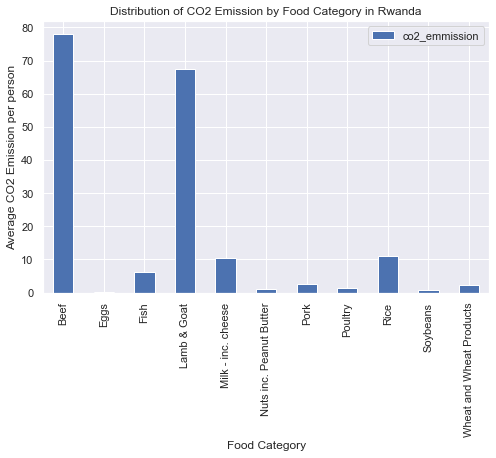

In [18]:
Rwanda = country_df.loc[country_df['country']=='Rwanda'].drop('country', axis=1)
print(Rwanda)

fig, ax = plt.subplots(figsize=(8,5))
sns.set()
Rwanda.set_index('food_category').plot(kind='bar', stacked=True, ax= ax)
plt.title('Distribution of CO2 Emission by Food Category in Rwanda')
plt.ylabel('Average CO2 Emission per person')
plt.xlabel('Food Category')
plt.show()

Beef has the highest average co2 emissions per person (78.07). Lamb & Goat (67.59) the second highest and Rice (11.13) the third highest.
Eggs has the lowest average co2 emissions per person (0.15). Soybeans (0.87) is the second lowest and Nuts inc. Peanut Butter (1.03) the third highest.

#### Ethiopia

                food_category  co2_emmission
396                      Beef         111.40
397                      Eggs           0.33
398                      Fish           0.38
399               Lamb & Goat          54.98
400        Milk - inc. cheese          62.87
401   Nuts inc. Peanut Butter           2.14
402                      Pork           0.07
403                   Poultry           0.71
404                      Rice           2.88
405                  Soybeans           0.20
406  Wheat and Wheat Products           5.96


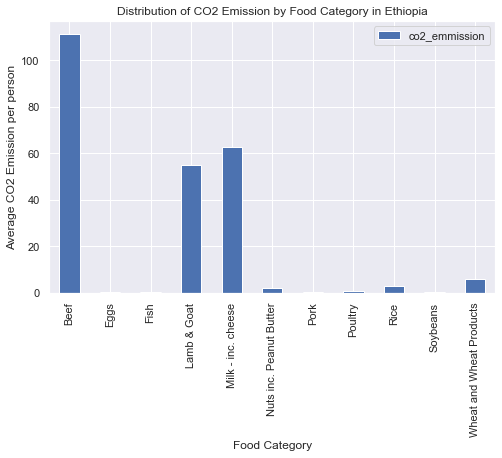

In [20]:
Ethiopia = country_df.loc[country_df['country']=='Ethiopia'].drop('country', axis=1)
print(Ethiopia)

fig, ax = plt.subplots(figsize=(8,5))
sns.set()
Ethiopia.set_index('food_category').plot(kind='bar', stacked=True, ax= ax)
plt.title('Distribution of CO2 Emission by Food Category in Ethiopia')
plt.ylabel('Average CO2 Emission per person')
plt.xlabel('Food Category')
plt.show()

Beef has the highest average co2 emissions per person (111.40). Milk - inc. cheese (62.87) the second highest and Lamb & Goat (54.98) the third highest. 
Pork has the lowest average co2 emissions per person (0.07). Soybeans (0.20) is the second lowest and Eggs (0.33) the third highest.

### 2. Highlight the marked difference between consumption and emissions in certain food product of your choice

<ipython-input-41-1ee936a30af0>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



               food_category  co2_emmission  consumption  difference
0                       Beef     374.102000    12.123385 -361.978615
1                       Eggs       7.499615     8.163769    0.664154
2                       Fish      27.601692    17.287077  -10.314615
3                Lamb & Goat      91.056769     2.600154  -88.456615
4         Milk - inc. cheese     179.153846   125.774692  -53.379154
5    Nuts inc. Peanut Butter       7.323000     4.137231   -3.185769
6                       Pork      57.070077    16.123692  -40.946385
7                    Poultry      22.793538    21.219231   -1.574308
8                       Rice      37.591615    29.375154   -8.216462
9                   Soybeans       0.387308     0.860538    0.473231
10  Wheat and Wheat Products      13.644462    71.549538   57.905077


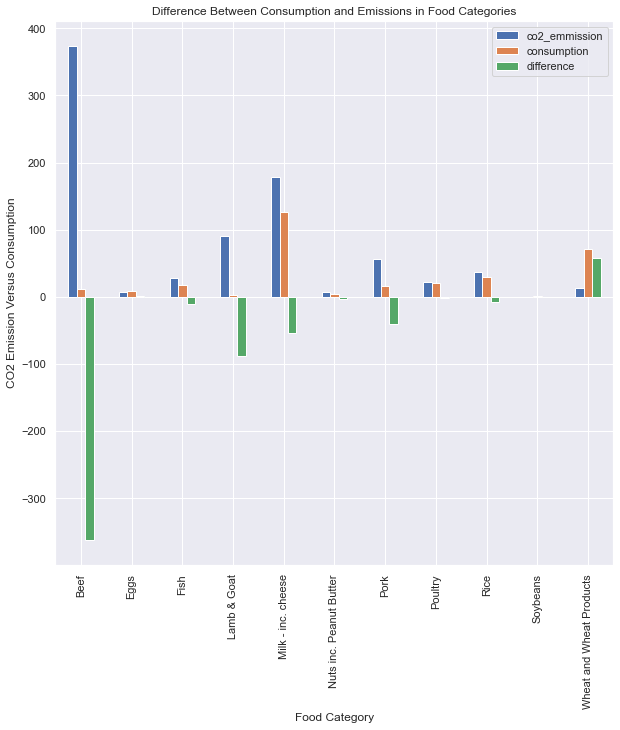

In [41]:
emission_consumption_df= food.groupby("food_category")['co2_emmission','consumption'].mean().reset_index()
emission_consumption_df['difference'] = emission_consumption_df['consumption'] - emission_consumption_df['co2_emmission']
print(emission_consumption_df)

fig, ax = plt.subplots(figsize=(10,10))
sns.set()
emission_consumption_df.set_index('food_category').plot(kind='bar', stacked=False, ax= ax)
plt.title('Difference Between Consumption and Emissions in Food Categories')
plt.xlabel("Food Category")
plt.ylabel("CO2 Emission Versus Consumption")
plt.show()


Beef has the biggest difference between consumption and co2 emission. The co2 emission is more than consumption by 361.98.

Lamb & Goat also has the big difference between consumption and co2 emission. The co2 emission is more than consumption by 88.46.

Wheat and Wheat Products also has the big difference between consumption and co2 emission. The co2 emission is less than consumption by 57.91.

Soybeans (0.47) and eggs (0.66) have a very small difference between consumption and co2 emission. In both consumption is more than co2 emission.

The food categories that have more co2 emission than consumption are: Beef, Lamb & Goat, Milk - inc. cheese, Pork, Fish, Rice, Nuts inc. Peanut Butter and Poultry.

The food categories that have less co2 emission than consumption are: Soybeans, Eggs, Wheat and Wheat Products.

In [ ]:
trace = go.Scatter(
    y = food_df.co2_emmission,
    x = food_df["food_category"],
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = food_df.co2_emmission*2,
        color = food_df.co2_emmission,
        colorscale='Portland',
        showscale=True
    )
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'CO2 Emissions by Foods',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'CO2 Emission',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterplot')


### 3. The food consumption of animal and non-animal products and the impact on carbon footprint.

In [30]:
food_df = food.groupby("food_category")['co2_emmission'].sum().reset_index()
food_df

,food_category,co2_emmission
0,Beef,48633.26
1,Eggs,974.95
2,Fish,3588.22
3,Lamb & Goat,11837.38
4,Milk - inc. cheese,23290.00
5,Nuts inc. Peanut Butter,951.99
6,Pork,7419.11
7,Poultry,2963.16
8,Rice,4886.91
9,Soybeans,50.35


               food_category  co2_emmission
9                   Soybeans          50.35
5    Nuts inc. Peanut Butter         951.99
1                       Eggs         974.95
10  Wheat and Wheat Products        1773.78
7                    Poultry        2963.16
2                       Fish        3588.22
8                       Rice        4886.91
6                       Pork        7419.11
3                Lamb & Goat       11837.38
4         Milk - inc. cheese       23290.00
0                       Beef       48633.26


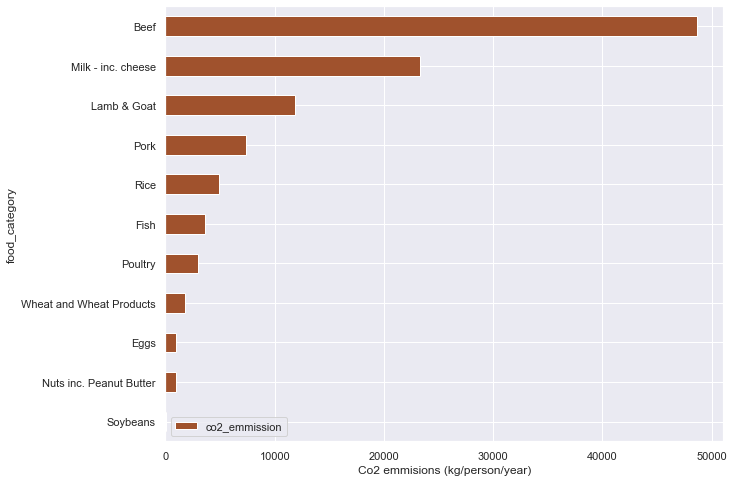

In [31]:
temp_df= food_df.sort_values(by= 'co2_emmission', ascending= True)[['food_category','co2_emmission']]
print(temp_df)

fig, ax = plt.subplots(figsize=(10,8))
sns.set()
temp_df.set_index('food_category').plot(kind='barh', stacked=True, ax= ax, color= "sienna")
plt.xlabel("Co2 emmisions (kg/person/year)")
plt.show()

Animal based food products account for large amounts of CO2 emissions compared to non-animal food products.

CO2 emissions from most plant based foods are much lower than most animal based foods.

### 4. A box plot and interpretation of the CO2 contributions of food levels

               food_category  co2_emmission
0                       Beef       48633.26
4         Milk - inc. cheese       23290.00
3                Lamb & Goat       11837.38
6                       Pork        7419.11
8                       Rice        4886.91
2                       Fish        3588.22
7                    Poultry        2963.16
10  Wheat and Wheat Products        1773.78
1                       Eggs         974.95
5    Nuts inc. Peanut Butter         951.99
9                   Soybeans          50.35


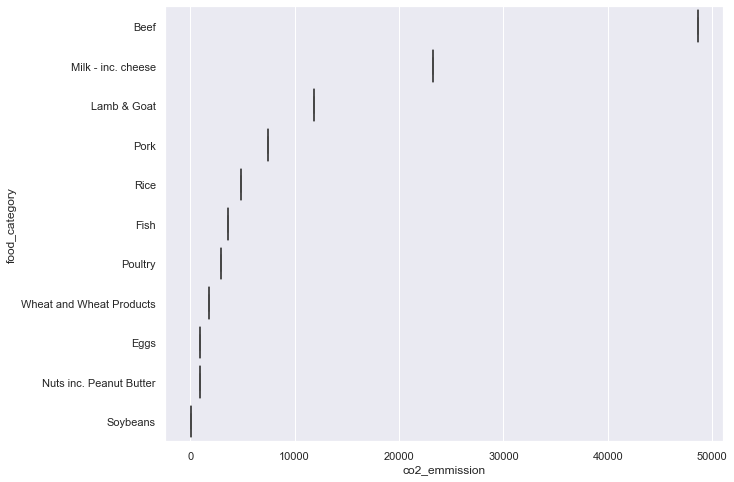

In [38]:
box_df= food_df.sort_values(by= 'co2_emmission', ascending= False)[['food_category','co2_emmission']]
print(box_df)

plt.subplots(figsize=(10,8))
sns.boxplot(x='co2_emmission', y='food_category', data=box_df)


#### There is a common theme in this analysis. Animal based foods use more resources and have higher carbon footprint than plant based diets. Time to think about what you eat. Choose your food wisely and stay healthy!